# Neural Network Implementation

This exercise contains a very simple implementation of a neural network.
You will require knownledge of python and numpy to do this exercise.

In [1]:
import numpy as np

In [2]:
def plot_data(signal, background, neuralnet=None):
    import matplotlib.pyplot as plt
    plt.scatter(signal[:, 0], signal[:, 1], alpha=0.3)
    plt.scatter(background[:, 0], background[:, 1], alpha=0.3)
    if neuralnet is not None:
        support = np.arange(-5.0, 5.5, 0.5)
        X, Y = np.meshgrid(support, support)
        R = np.array([[float(neuralnet.predict(np.array([[x, y]]))) for x in support] for y in support])
        plt.contourf(X, Y, R ,alpha=0.5)
    plt.show()

(1000, 2) (1000, 2)


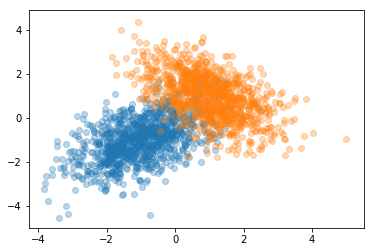

In [3]:
N = 1000
signal = np.random.multivariate_normal([-1.0,-1.0],[[1.0,0.5],[0.5,1.0]],(N,))
bckgrd = np.random.multivariate_normal([1.0,1.0],[[1.0,-0.5],[-0.5,1.0]],(N,))
print(signal.shape, bckgrd.shape)
plot_data(signal, bckgrd)

## Neural Network

** Feed Forward **
$$ a_h = \sum_i w_{hi} x_i $$
$$ x_h = \tanh{a_h}$$
$$ a_o = \sum_h w_{oh} x_h $$
$$ x_o = \tanh{a_o}$$

**Backpropagation Algorithm**

$$\frac{\mathrm{d}E}{\mathrm{d}w} = \frac{\partial E}{\partial x} \cdot \frac{\partial x}{\partial a} \cdot \frac{\partial a}{\partial w}$$

** Output Layer **
$$E \left( x_o \right) = \frac{1}{2} \left( x_o - t \right)^2 $$

** Hidden Layer **
$$E \left( x_h \right) = E \left( x_o(x_h) \right)$$

In [11]:
class NeuralNetwork(object):
    def __init__(self, n_input, n_hidden):
        self.w_hi = np.random.normal(size=(n_input, n_hidden))
        self.w_oh = np.random.normal(size=n_hidden)

    def fit(self, x_i, t):
        for step in range(1, 1000):
            # Propagate input through hidden and output layer
            a_h = np.dot(x_i, self.w_hi)
            x_h = np.tanh(a_h)
            a_o = np.dot(x_h, self.w_oh)
            x_o = np.tanh(a_o)
            # Back-Propagate error signal
            d = lambda x: 4*np.cosh(x)**2/(np.cosh(2*x) + 1)**2
            e_o = d(a_o)*(x_o - t)
            e_h = d(a_h)*np.outer(e_o, self.w_oh)
            # Update weights
            self.w_oh -= 0.01 * np.dot(e_o.T, x_h)
            self.w_hi -= 0.01 * np.dot(x_i.T, e_h)

    def predict(self, x_i):
        # Propagate input trough hidden layer
        x_h = np.tanh(np.dot(x_i, self.w_hi))
        # Propagate output of hidden layer through output layer
        return np.tanh(np.dot(x_h, self.w_oh))

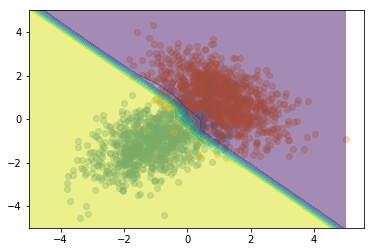

In [12]:
nn = NeuralNetwork(2, 4)
nn.fit(np.vstack([signal, bckgrd]),
       np.hstack([np.ones(N), -np.ones(N)]))
plot_data(signal, bckgrd, neuralnet=nn)

## Exercise 1

  1. Understand the implementation of the neural network given above
  1. Change the learning rate. What happens for large (small) values
  1. Change the input dataset to something more complicated. Does the network still work?
  1. Implement weight decay (that is add a term $\alpha w^T w$ to the loss function, and derive the correct new update rules)